In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os, sys



PYTHON_PATHS = ['/home/alena/repos/ros-bag-processing']
for path in PYTHON_PATHS:
    if path not in sys.path:
        sys.path.append(path)
        
        
# from ros_bag_processing.enlighting.hist_norm import HistNormModel
from ros_bag_processing.enlighting.gamma import GammaModel
import utils

!pip uninstall -y onnxruntime-gpu
!pip install onnxruntime

try:
    from enlighten_inference import EnlightenOnnxModel as EnlightenGanModel
except:
    print("Error")
    sys.exit()
import onnxruntime as rt
rt.get_device()

'CPU'

In [2]:
def predict(rgb_image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    equalized_image_r = clahe.apply(rgb_image[:,:,0])
    equalized_image_g = clahe.apply(rgb_image[:,:,1])
    equalized_image_b = clahe.apply(rgb_image[:,:,2])
    equalized_image = np.concatenate((equalized_image_r[:,:,None], equalized_image_g[:,:,None], equalized_image_b[:,:,None]), axis=2)
    return equalized_image

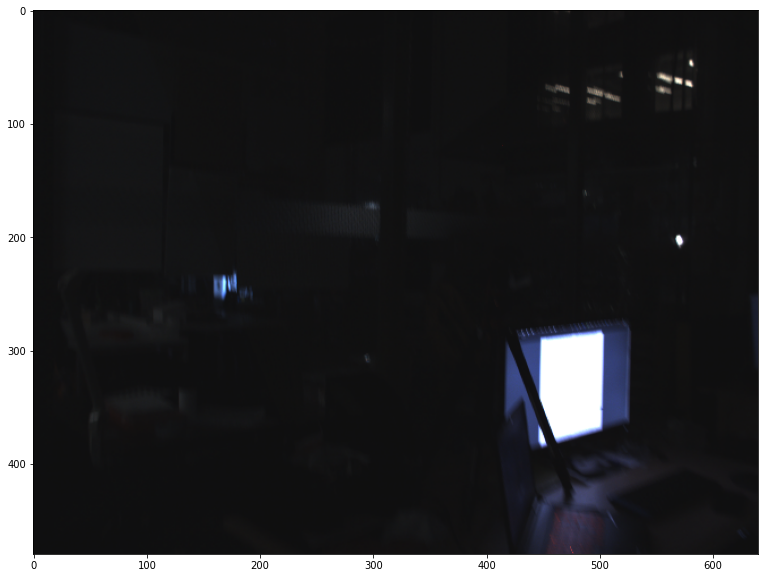

In [3]:
dataset_path = "/home/alena/Documents/dark-slam/datasets/testA/"
image_names = np.sort(os.listdir(dataset_path))

img = cv2.imread(dataset_path + image_names[5])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplots(figsize=(20, 10))
plt.imshow(img)

In [4]:
model_gan = EnlightenGanModel()

In [5]:
img_gan = model_gan.predict(img)
img_clahe = predict(img)
img_gan_clahe = predict(img_gan)

Text(0.5, 1.0, 'Gamma Histogram, mean: 125.27')

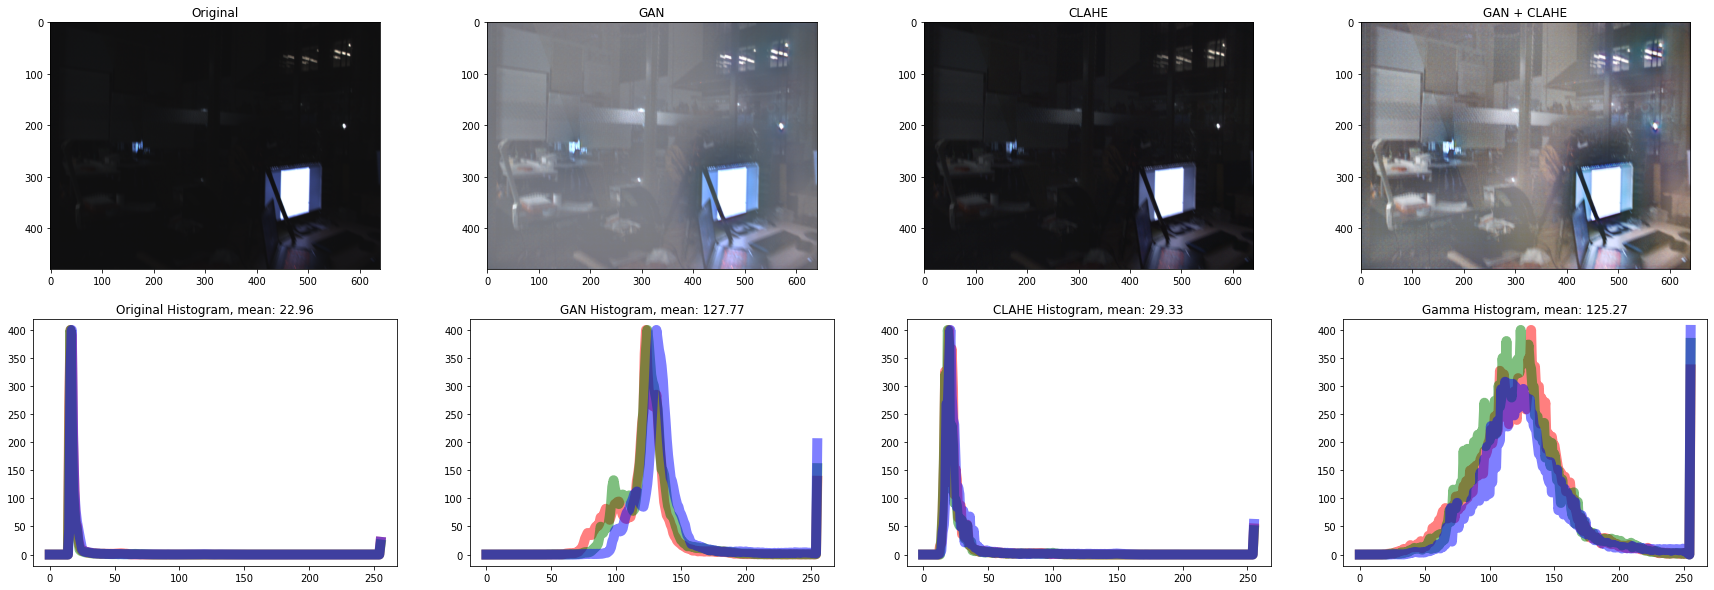

In [6]:
r_hist_hist, g_hist_hist, b_hist_hist = utils.get_rgb_hists(img_clahe)
r_gan_hist, g_gan_hist, b_gan_hist = utils.get_rgb_hists(img_gan)
r_orig_hist, g_orig_hist, b_orig_hist = utils.get_rgb_hists(img)

r_gamma_hist, g_gamma_hist, b_gamma_hist = utils.get_rgb_hists(img_gan_clahe)

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(30,10))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img_gan)
ax[0, 1].set_title('GAN')
ax[0, 2].imshow(img_clahe)
ax[0, 2].set_title('CLAHE')
ax[0, 3].imshow(img_gan_clahe)
ax[0, 3].set_title('GAN + CLAHE')

ax[1, 0].plot(r_orig_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 0].plot(g_orig_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 0].plot(b_orig_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 0].set_title('Original Histogram, mean: ' + str(np.round(img.mean(), 2)))

ax[1, 1].plot(r_gan_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 1].plot(g_gan_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 1].plot(b_gan_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 1].set_title('GAN Histogram, mean: ' + str(np.round(img_gan.mean(), 2)))

ax[1, 2].plot(r_hist_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 2].plot(g_hist_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 2].plot(b_hist_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 2].set_title('CLAHE Histogram, mean: ' + str(np.round(img_clahe.mean(), 2)))

ax[1, 3].plot(r_gamma_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 3].plot(g_gamma_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 3].plot(b_gamma_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 3].set_title('Gamma Histogram, mean: ' + str(np.round(img_gan_clahe.mean(), 2)))

In [7]:
model_gamma = GammaModel(gamma=4)

def predict(rgb_image):
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4,4))
    equalized_image_r = clahe.apply(rgb_image[:,:,0])
    equalized_image_g = clahe.apply(rgb_image[:,:,1])
    equalized_image_b = clahe.apply(rgb_image[:,:,2])
    equalized_image = np.concatenate((equalized_image_r[:,:,None], equalized_image_g[:,:,None], equalized_image_b[:,:,None]), axis=2)
    return equalized_image

In [8]:
img_gamma = model_gamma.predict(img)
img_clahe = predict(img)
img_gamma_clahe = predict(img_gamma)

Text(0.5, 1.0, 'Gamma Histogram, mean: 125.27')

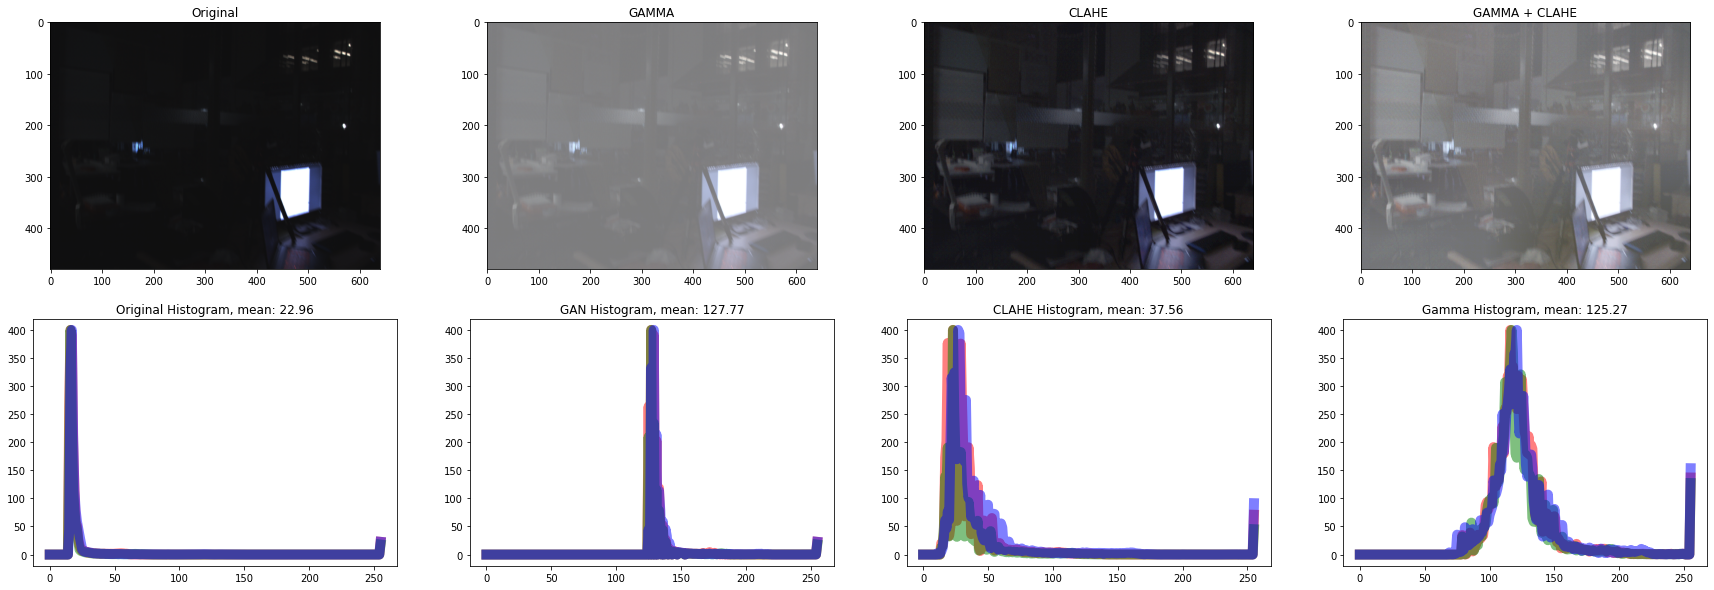

In [9]:
r_hist_hist, g_hist_hist, b_hist_hist = utils.get_rgb_hists(img_clahe)
r_gamma_hist, g_gamma_hist, b_gamma_hist = utils.get_rgb_hists(img_gamma)
r_orig_hist, g_orig_hist, b_orig_hist = utils.get_rgb_hists(img)

r_gamma_clahe_hist, g_gamma_clahe_hist, b_gamma_clahe_hist = utils.get_rgb_hists(img_gamma_clahe)

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(30,10))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img_gamma)
ax[0, 1].set_title('GAMMA')
ax[0, 2].imshow(img_clahe)
ax[0, 2].set_title('CLAHE')
ax[0, 3].imshow(img_gamma_clahe)
ax[0, 3].set_title('GAMMA + CLAHE')

ax[1, 0].plot(r_orig_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 0].plot(g_orig_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 0].plot(b_orig_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 0].set_title('Original Histogram, mean: ' + str(np.round(img.mean(), 2)))

ax[1, 1].plot(r_gamma_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 1].plot(g_gamma_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 1].plot(b_gamma_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 1].set_title('GAN Histogram, mean: ' + str(np.round(img_gan.mean(), 2)))

ax[1, 2].plot(r_hist_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 2].plot(g_hist_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 2].plot(b_hist_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 2].set_title('CLAHE Histogram, mean: ' + str(np.round(img_clahe.mean(), 2)))

ax[1, 3].plot(r_gamma_clahe_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 3].plot(g_gamma_clahe_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 3].plot(b_gamma_clahe_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 3].set_title('Gamma Histogram, mean: ' + str(np.round(img_gan_clahe.mean(), 2)))

Text(0.5, 1.0, 'GAN patch')

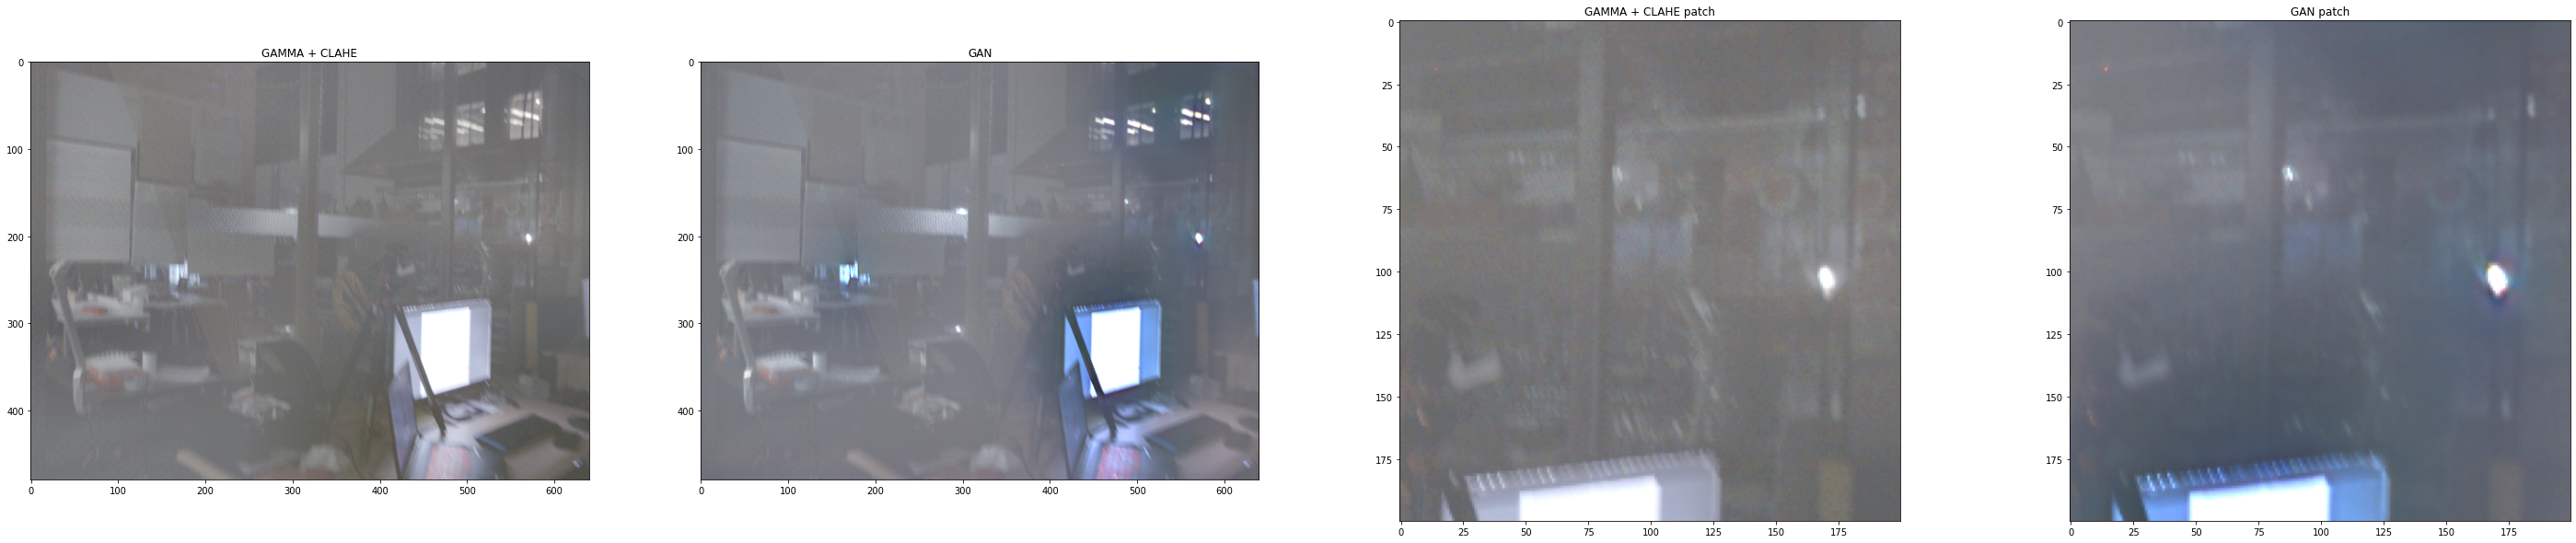

In [10]:
h1, h2 = [100, 300]
w1, w2 = [400, 600]

fig, ax = plt.subplots(ncols=4, figsize=(50, 10))

ax[0].imshow(img_gamma_clahe)
ax[0].set_title("GAMMA + CLAHE")

ax[1].imshow(img_gan)
ax[1].set_title("GAN")

ax[2].imshow(img_gamma_clahe[h1:h2, w1:w2])
ax[2].set_title("GAMMA + CLAHE patch")

ax[3].imshow(img_gan[h1:h2, w1:w2])
ax[3].set_title("GAN patch")

### Images Histogram examples

Dark Images

Average r: 8153, g: 9147, b: 8871


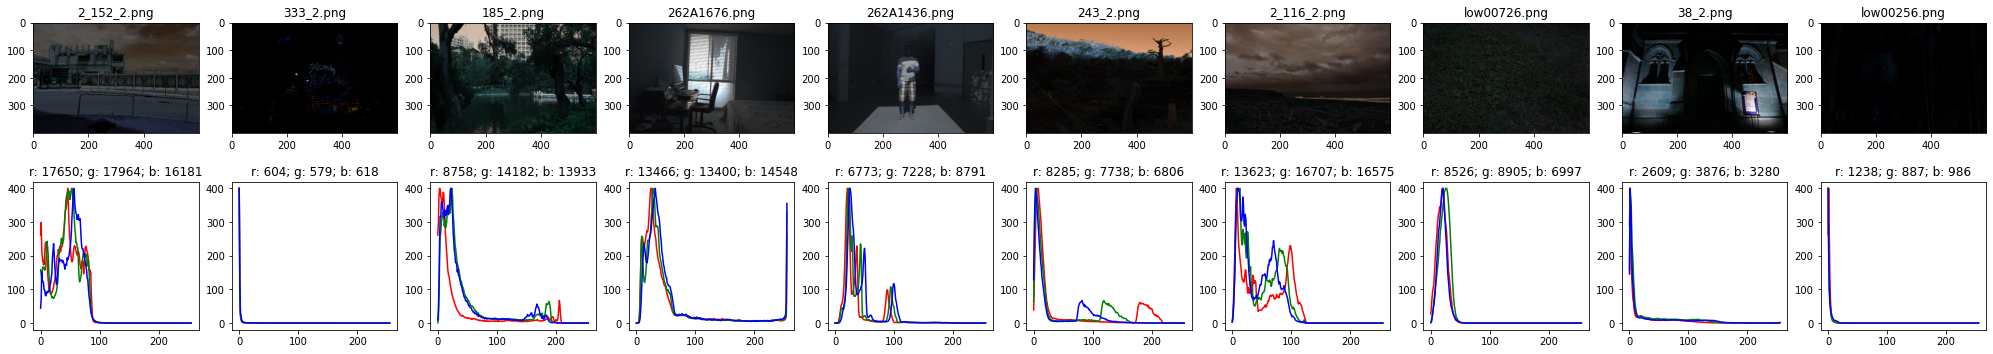

In [179]:
dataset = "/home/alena/Documents/dark-slam/datasets/trainA"
image_names = os.listdir(dataset)

N = 10
sum_r = 0
sum_b = 0
sum_g = 0

fig, ax = plt.subplots(ncols=N, nrows=2, figsize=(35, 6))
for i in range(N):
    img = cv2.imread(os.path.join(dataset, image_names[i]))
    r_orig_hist, g_orig_hist, b_orig_hist = utils.get_rgb_hists(img)
    ax[0, i].set_title(image_names[i])
    ax[0, i].imshow(img)
    
    ax[1, i].set_title(f'r: {round(np.sum(r_orig_hist))}; g: {round(np.sum(g_orig_hist))}; b: {round(np.sum(b_orig_hist))}')
    ax[1, i].plot(r_orig_hist, 'r')
    ax[1, i].plot(g_orig_hist, 'g')
    ax[1, i].plot(b_orig_hist, 'b')
    
    sum_r += np.sum(r_orig_hist)
    sum_g += np.sum(g_orig_hist)
    sum_b += np.sum(b_orig_hist)


print(f"Average r: {round(sum_r / N)}, g: {round(sum_g / N)}, b: {round(sum_b / N)}")

Average r: 17234, g: 21809, b: 21830


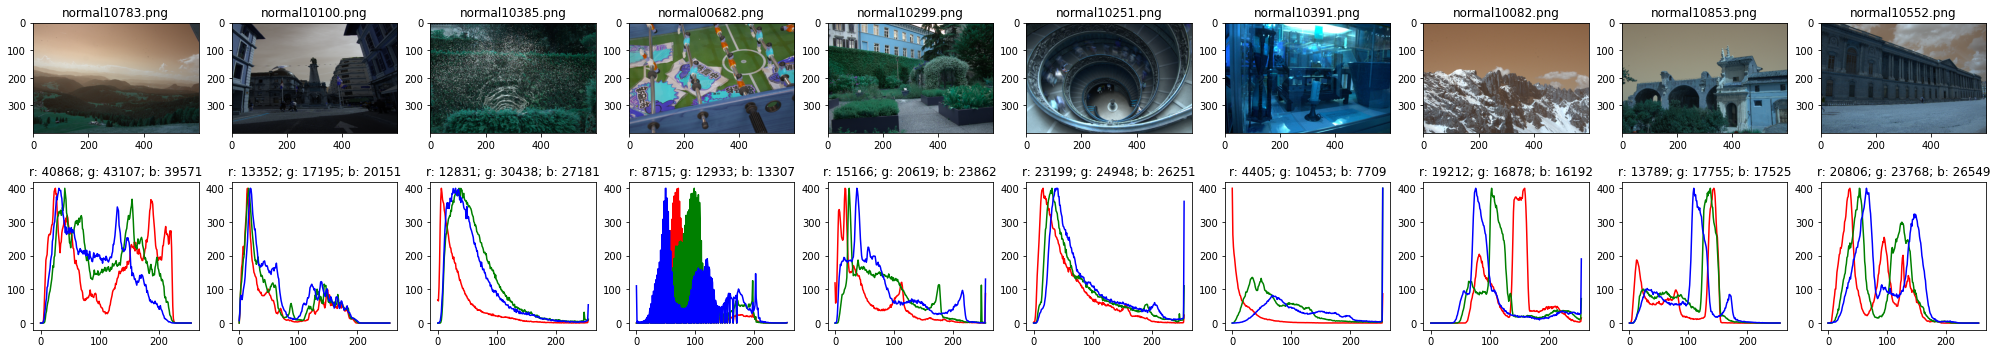

In [178]:
dataset = "/home/alena/Documents/dark-slam/datasets/trainB"
image_names = os.listdir(dataset)

N = 10
sum_r = 0
sum_b = 0
sum_g = 0

fig, ax = plt.subplots(ncols=N, nrows=2, figsize=(35, 6))
for i in range(N):
    img = cv2.imread(os.path.join(dataset, image_names[i]))
    r_orig_hist, g_orig_hist, b_orig_hist = utils.get_rgb_hists(img)
    ax[0, i].set_title(image_names[i])
    ax[0, i].imshow(img)
    
    ax[1, i].set_title(f'r: {round(np.sum(r_orig_hist))}; g: {round(np.sum(g_orig_hist))}; b: {round(np.sum(b_orig_hist))}')
    ax[1, i].plot(r_orig_hist, 'r')
    ax[1, i].plot(g_orig_hist, 'g')
    ax[1, i].plot(b_orig_hist, 'b')
    
    sum_r += np.sum(r_orig_hist)
    sum_g += np.sum(g_orig_hist)
    sum_b += np.sum(b_orig_hist)

print(f"Average r: {round(sum_r / N)}, g: {round(sum_g / N)}, b: {round(sum_b / N)}")

# Thesis

### Gamma Correction explained for Thesis


In [12]:
model_gamma2 = GammaModel(gamma=2)
img_gamma2 = model_gamma2.predict(img)
model_gamma4 = GammaModel(gamma=4)
img_gamma4 = model_gamma4.predict(img)

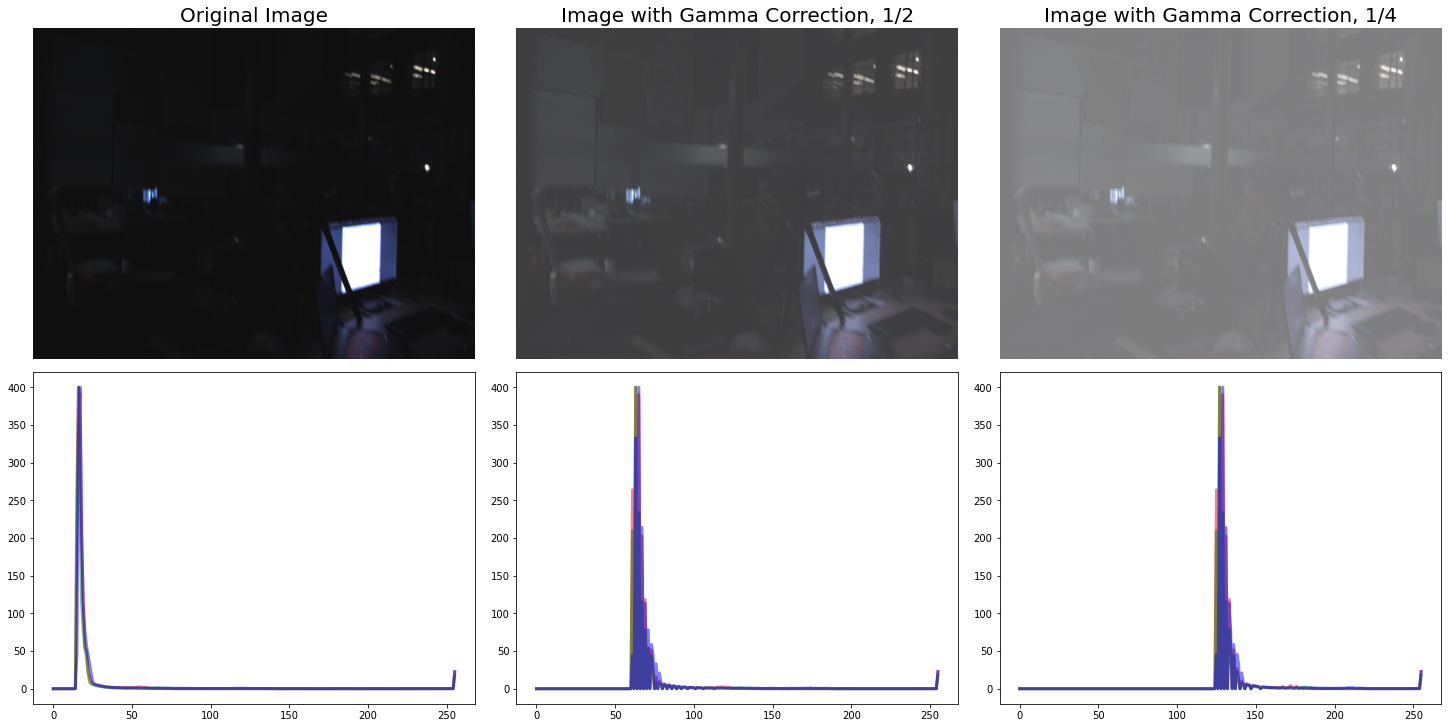

In [39]:
r_gamma2_hist, g_gamma2_hist, b_gamma2_hist = utils.get_rgb_hists(img_gamma2)
r_gamma4_hist, g_gamma4_hist, b_gamma4_hist = utils.get_rgb_hists(img_gamma4)

r_orig_hist, g_orig_hist, b_orig_hist = utils.get_rgb_hists(img)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10),constrained_layout=True)
ax[0, 0].imshow(img)
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])
ax[0, 0].set_title('Original Image', fontsize=20)
ax[0, 0].axis('off')
ax[0, 1].imshow(img_gamma2)
ax[0, 1].set_title(f'Image with Gamma Correction, 1/2', fontsize=20)
ax[0, 1].axis('off')

ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])

ax[0, 2].imshow(img_gamma4)
ax[0, 2].set_title(f'Image with Gamma Correction, 1/4', fontsize=20)
ax[0, 2].axis('off')


ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])


# ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[1, 0].plot(r_orig_hist, 'r', alpha=0.5, linewidth=3)
ax[1, 0].plot(g_orig_hist, 'g', alpha=0.5, linewidth=3)
ax[1, 0].plot(b_orig_hist, 'b', alpha=0.5, linewidth=3)

# ax[1,1].set_xticklabels([])
# ax[1, 1].set_yticklabels([])
ax[1, 1].plot(r_gamma2_hist, 'r', alpha=0.5, linewidth=3)
ax[1, 1].plot(g_gamma2_hist, 'g', alpha=0.5, linewidth=3)
ax[1, 1].plot(b_gamma2_hist, 'b', alpha=0.5, linewidth=3)


# ax[0,0].set_xticklabels([])
# ax[0,0].set_yticklabels([])
ax[1, 2].plot(r_gamma4_hist, 'r', alpha=0.5, linewidth=3)
ax[1, 2].plot(g_gamma4_hist, 'g', alpha=0.5, linewidth=3)
ax[1, 2].plot(b_gamma4_hist, 'b', alpha=0.5, linewidth=3)

In [40]:
fig.savefig('hisograms.png')